In [1]:
# Data Analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Model Training and Evaluation
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Interactive Prediction Widget
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Misc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv("train.csv")

# 1. Data Analysis

In [3]:
# Analyzing the data deeply to know actual memory usage.
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
data.shape

(17996, 17)

In [6]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [7]:
data.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


# 2. Data Visualization

In [8]:
numerical_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo', 'duration_in min/ms', 'time_signature']

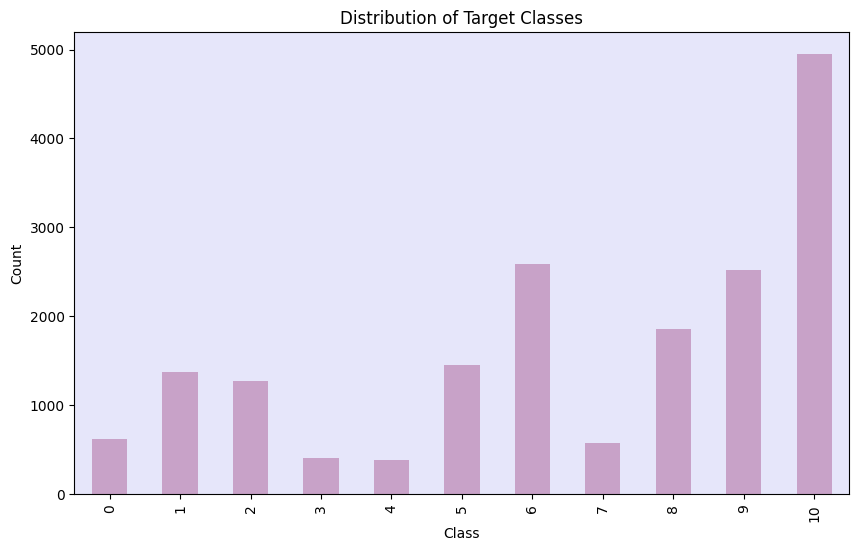

In [9]:
plt.figure(figsize=(10, 6))
data['Class'].value_counts().sort_index().plot(kind='bar', color='#c8a2c8')
plt.title('Distribution of Target Classes')
plt.gca().set_facecolor('lavender')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
# Assuming genre_counts is already defined
genre_counts = data['Class'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

fig = px.pie(genre_counts, names='Genre', values='Count', title='Genre Distribution Pie Chart',
             color_discrete_sequence=px.colors.sequential.PuRd)

fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

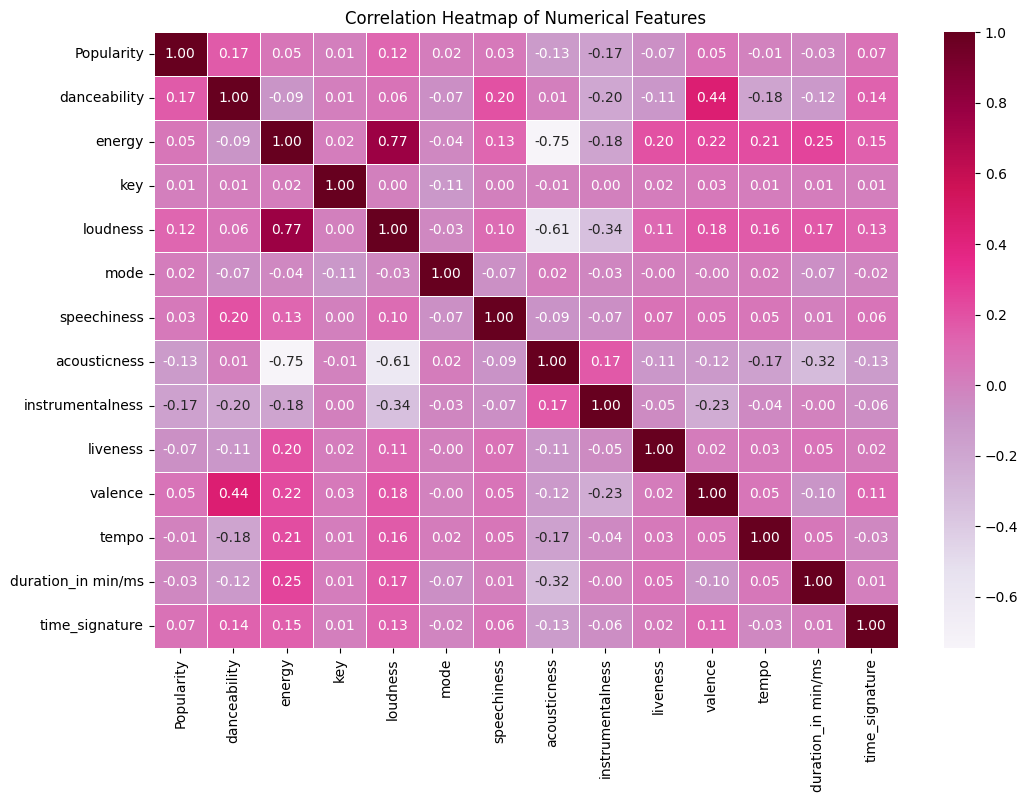

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show

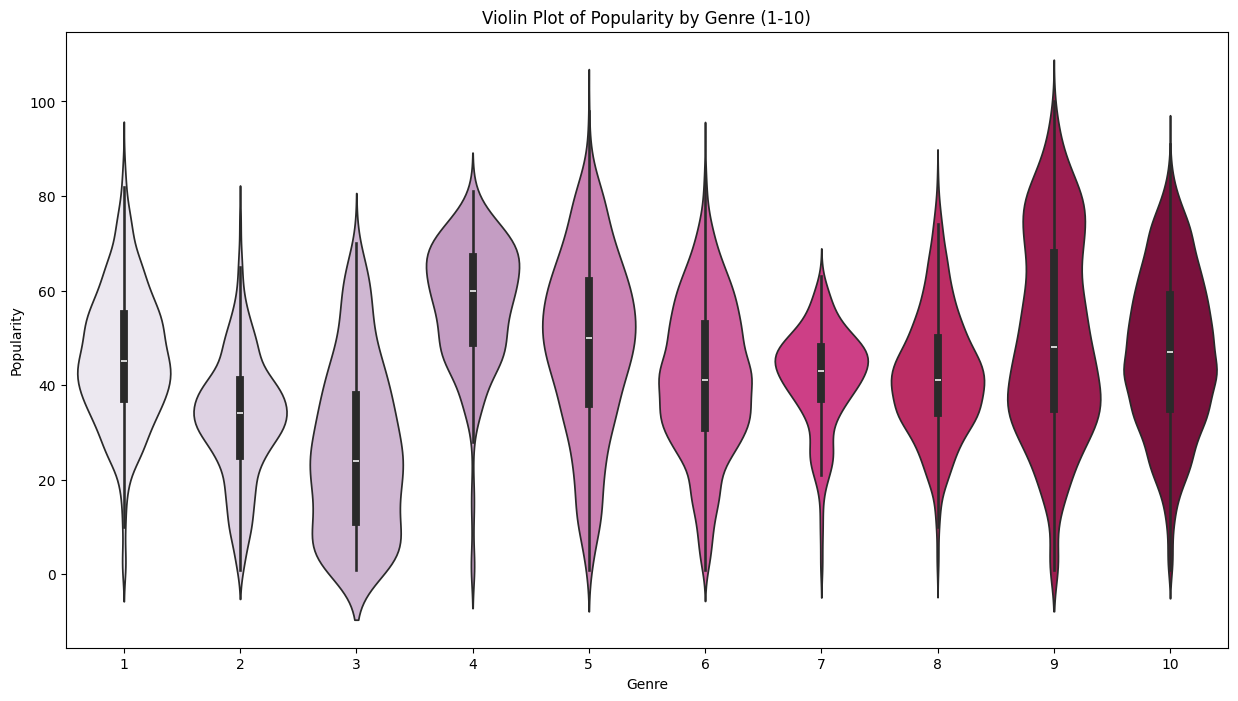

In [12]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Class', y='Popularity', data=data[data['Class'].isin(range(1, 11))], palette='PuRd')
plt.title('Violin Plot of Popularity by Genre (1-10)')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()


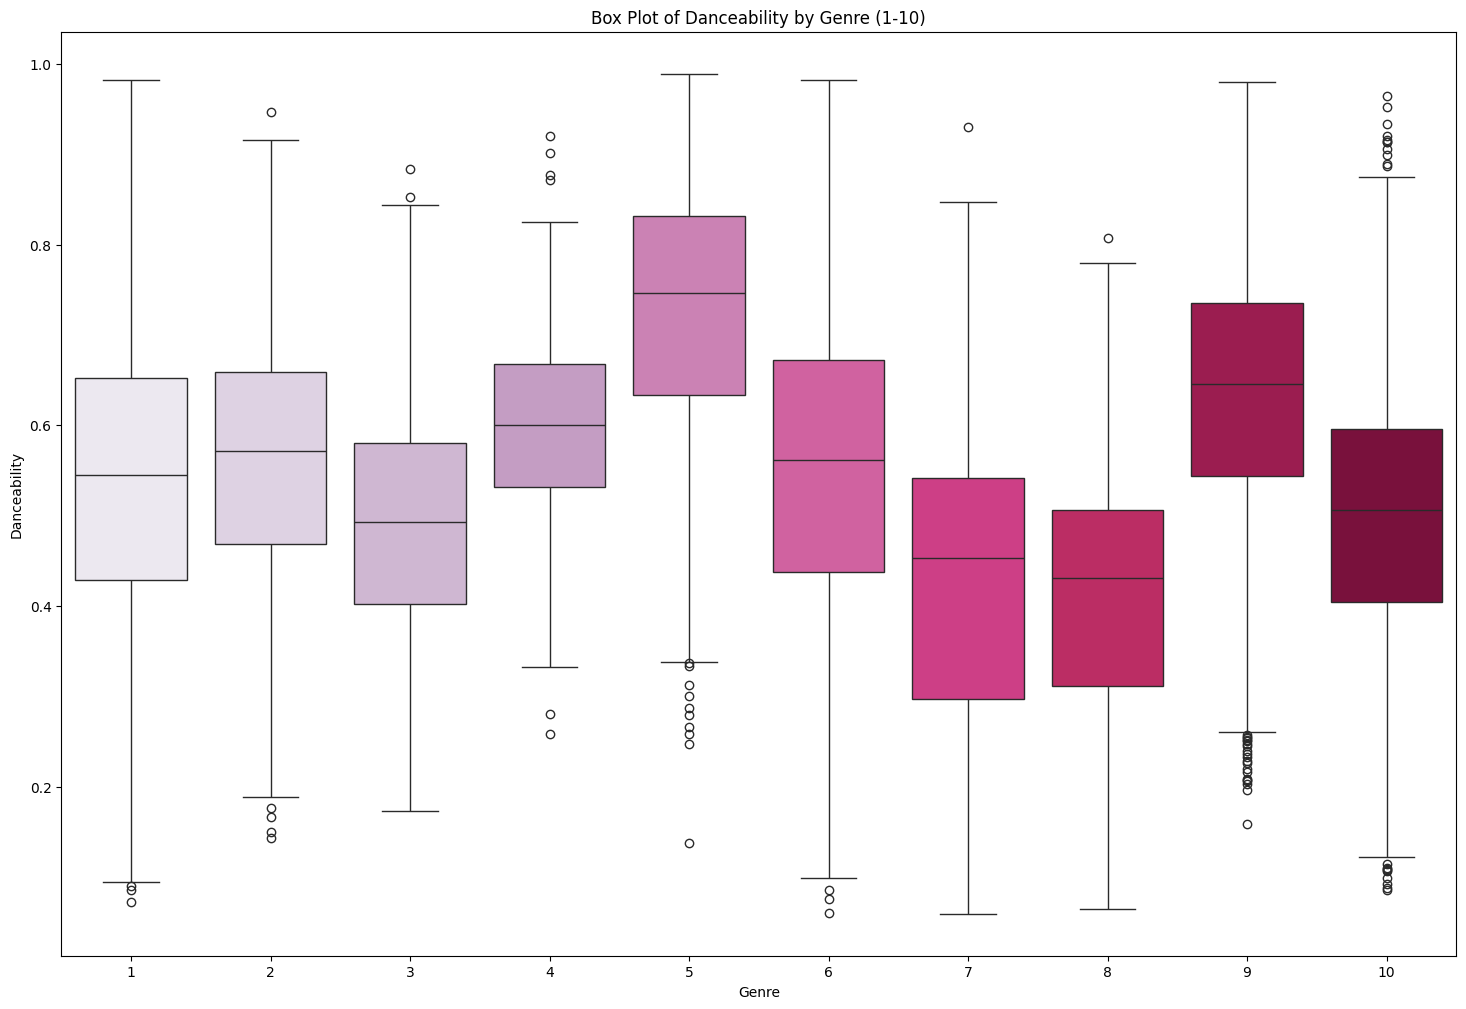

In [13]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Class', y='danceability', data=data[data['Class'].isin(range(1, 11))], palette='PuRd')
plt.title('Box Plot of Danceability by Genre (1-10)')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

In [14]:
# Create interactive scatter plot
fig = px.scatter_3d(data, x='danceability', y='energy', z='loudness', color='Class', size_max=18,
                   labels={'Class': 'Music Genre'})
fig.update_layout(scene=dict(xaxis_title='Danceability', yaxis_title='Energy', zaxis_title='Loudness'))
fig.show()

# 3. Data Preprocessing

In [15]:
# Handle missing values
data['Popularity'].fillna(data['Popularity'].mean(), inplace=True)
data['key'].fillna(data['key'].mean(), inplace=True)
data['instrumentalness'].fillna(data['instrumentalness'].mean(), inplace=True)

In [16]:
# Encode categorical variables (artist name and track name)
label_encoder = LabelEncoder()
data_encoded = data.copy()
data_encoded['Artist Name'] = label_encoder.fit_transform(data['Artist Name'].str.lower())
data_encoded['Track Name'] = label_encoder.fit_transform(data['Track Name'].str.lower())

In [17]:
# Get feature names after encoding
encoded_feature_names = list(data_encoded.columns)
encoded_feature_names.remove('Class')  # Remove the target variable

In [18]:
# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo', 'duration_in min/ms', 'time_signature']

In [19]:
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# 4. Model Training and Evaluation

In [20]:
# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['Class'])
y = data_encoded['Class']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# SMOTE on the oversampled data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_ros, y_ros)

In [23]:
# Assign feature names to X_resampled
X_resampled.columns = encoded_feature_names

In [24]:
# Split resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [25]:
# Define classifiers
classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=42),
}

In [26]:
# Dictionary to store accuracy values
accuracy_dict = {}

In [27]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"\nTraining and evaluating {clf_name}...")
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[clf_name] = accuracy
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy ({clf_name}): {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)


Training and evaluating Gradient Boosting...
Accuracy (Gradient Boosting): 0.5588
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       172
           1       0.27      0.01      0.02       340
           2       0.55      0.52      0.53       340
           3       0.79      0.70      0.74       104
           4       0.61      0.73      0.66        84
           5       0.70      0.71      0.70       340
           6       0.42      0.35      0.38       626
           7       0.91      0.93      0.92       134
           8       0.61      0.59      0.60       473
           9       0.60      0.57      0.59       663
          10       0.49      0.67      0.56      1223

    accuracy                           0.56      4499
   macro avg       0.61      0.60      0.59      4499
weighted avg       0.54      0.56      0.54      4499


Training and evaluating Random Forest...
Accuracy (Random Forest): 0.5226
Classi

# 5. Classifier Visualizations

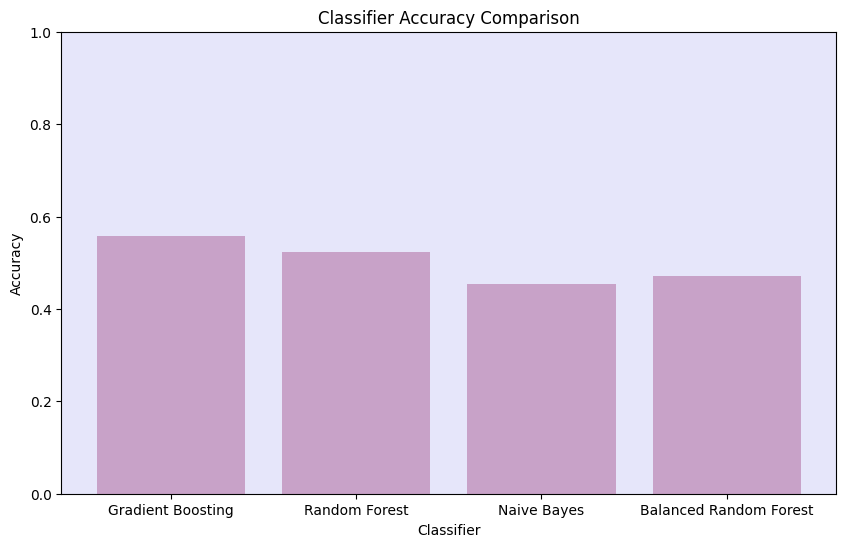

In [28]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
# Set a custom background color for the entire bar chart
plt.gca().set_facecolor('lavender')
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='#c8a2c8')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper scale (0 to 1)
plt.show()

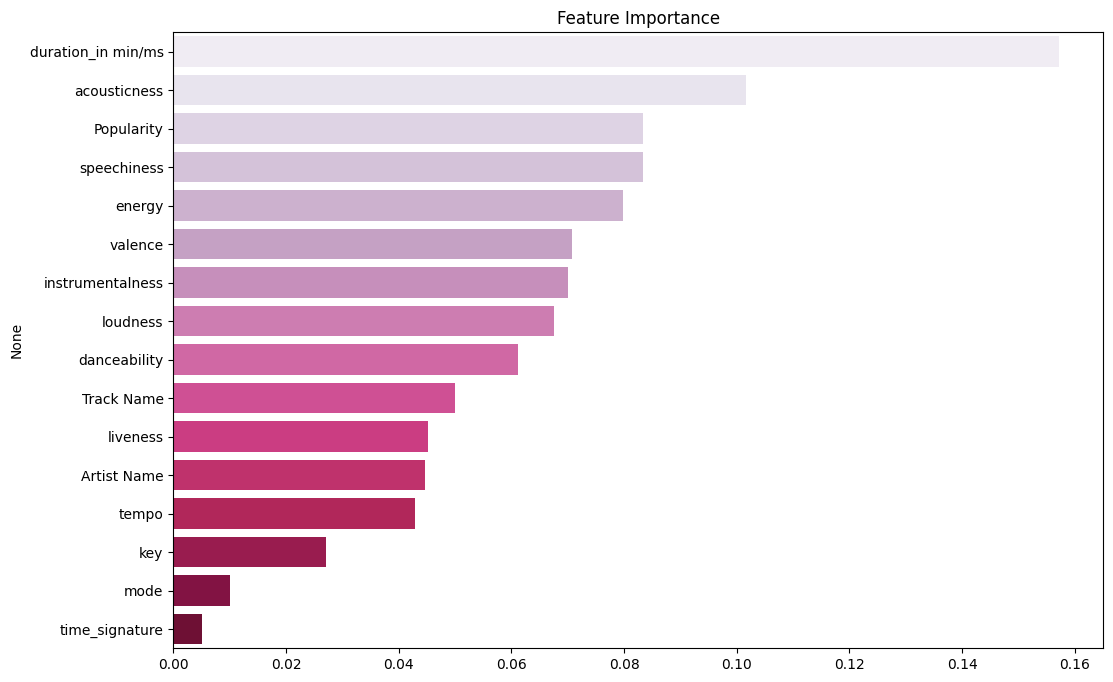

In [29]:
# Feature Importance Plot
feature_importance = clf.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx], palette='PuRd')
plt.title("Feature Importance")
plt.show()


Training and evaluating Gradient Boosting...


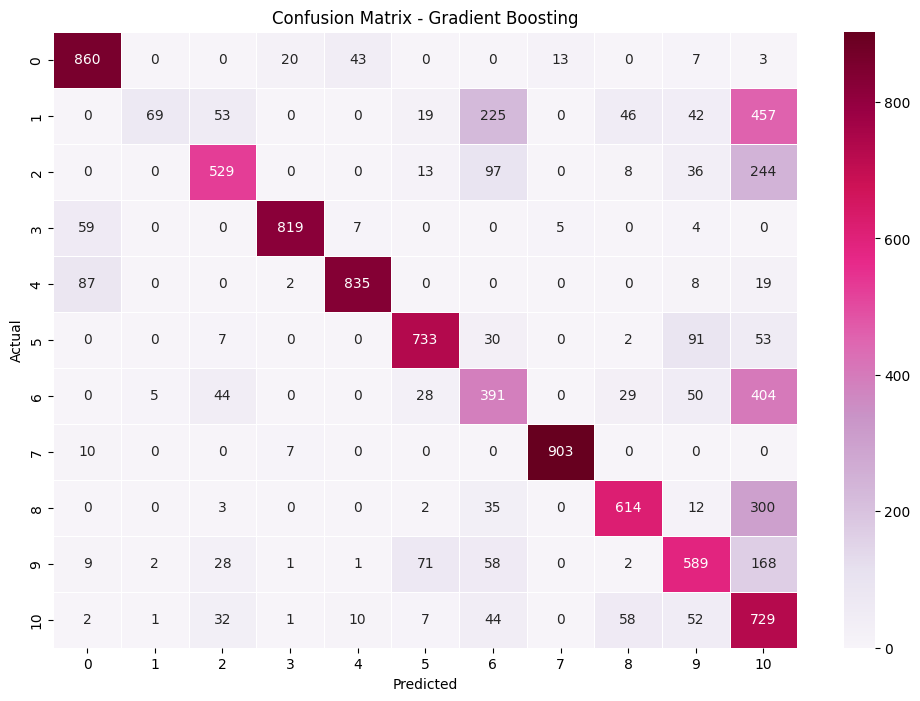


Training and evaluating Random Forest...


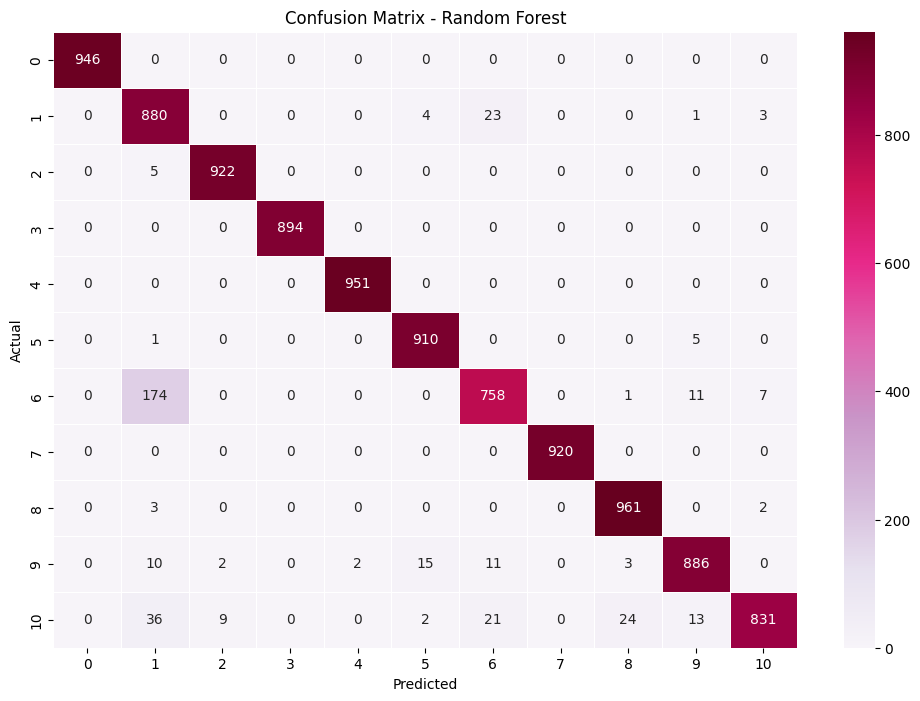


Training and evaluating Naive Bayes...


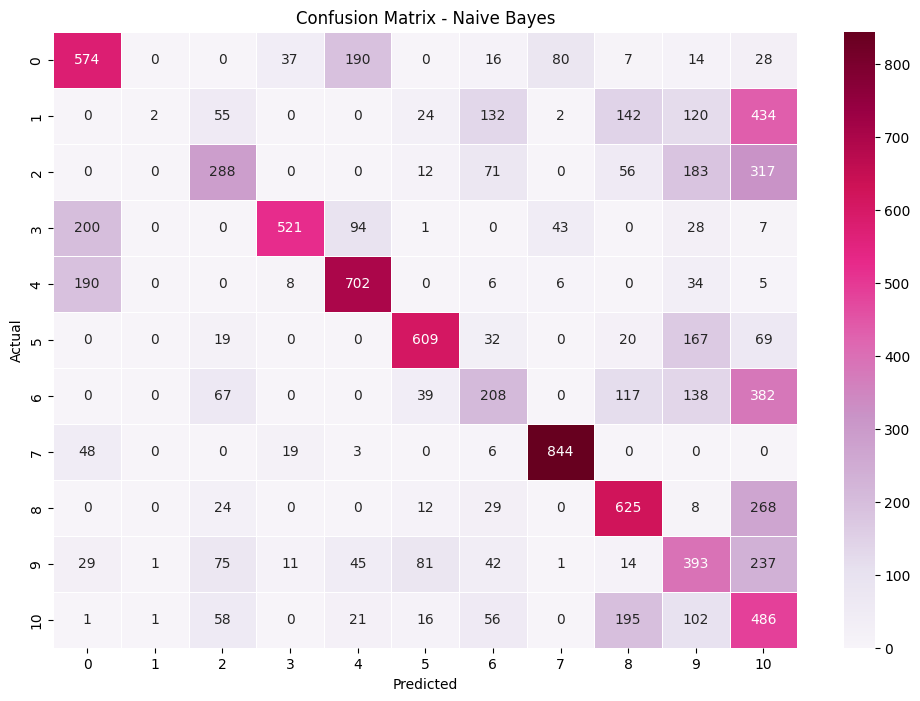


Training and evaluating Balanced Random Forest...


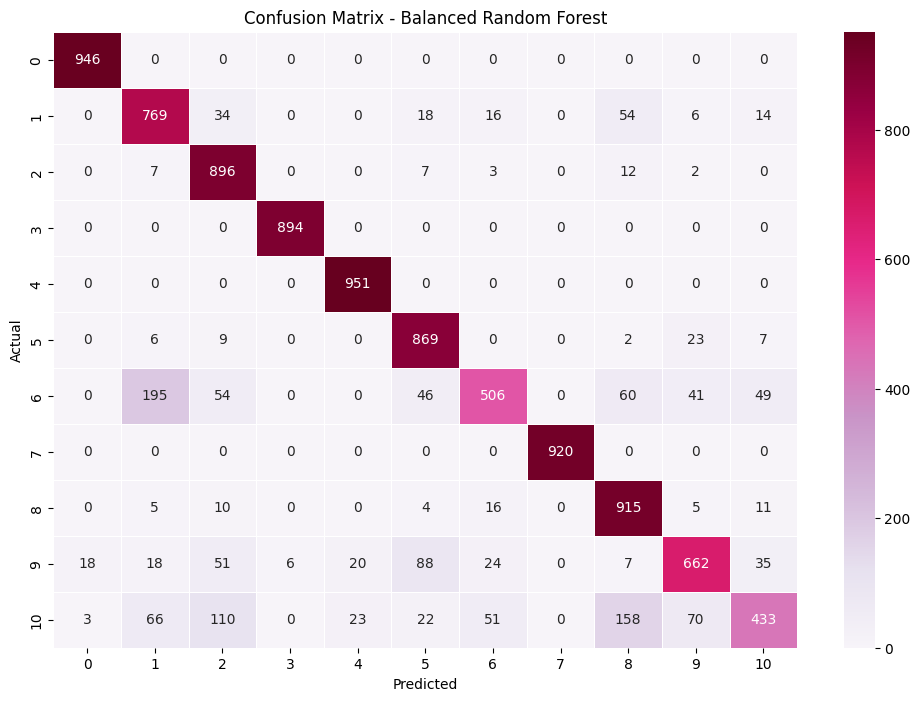

In [30]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    print(f"\nTraining and evaluating {clf_name}...")
    
    # Make predictions
    y_pred = clf.predict(X_test_resampled)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test_resampled, y_pred)
    
    
    # Adjust figure size based on the number of features
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d',linewidths=0.5, cmap='PuRd', )    
    plt.title(f"Confusion Matrix - {clf_name}"),
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 6. Interactive Prediction Widget

In [31]:
# Create mapping between actual track names and encoded values
track_name_to_encoded = dict(zip(data['Track Name'], data_encoded['Track Name']))

In [32]:
# Create dropdown for track selection using actual track names
track_dropdown = widgets.Dropdown(
    options=data['Track Name'].unique(),
    value=data['Track Name'].unique()[0],
    description='Select Track:'
)

In [33]:
# Button to predict the genre
predict_button = widgets.Button(description='Predict Genre')

# Output area for displaying the predicted genre
output_area = widgets.Output()

In [34]:
# Function to perform majority voting
def majority_vote(predictions):
    vote_counter = Counter(predictions)
    majority_class = vote_counter.most_common(1)[0][0]
    return majority_class

In [35]:
# Function to handle button click event
def on_button_click(b):
    with output_area:
        clear_output(wait=True)
        # Fetch values from the selected track details
        selected_track_name = track_dropdown.value
        encoded_value = track_name_to_encoded[selected_track_name]
        selected_track_data = data_encoded[data_encoded['Track Name'] == encoded_value].iloc[0]

        # Prepare the input data for prediction
        input_data = [selected_track_data.drop('Class').values]

        # List to store predictions from all classifiers
        all_predictions = []

        # HTML content for all predictions
        predictions_html = ''

        # Iterate over all classifiers and make predictions
        for clf_name, clf in classifiers.items():
            predicted_class = clf.predict(input_data)[0]
            all_predictions.append(predicted_class)

            # Map the predicted class to the actual genre
            genre_mapping = {
                0: 'Acoustic/Folk', 1: 'Alt_Music', 2: 'Blues', 3: 'Bollywood', 4: 'Country',
                5: 'HipHop', 6: 'Indie Alt', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock'
            }
            predicted_genre = genre_mapping.get(predicted_class, 'Unknown')

            # Concatenate HTML content for each prediction
            predictions_html += f'<p style="color: #f4f3f3; font-size: 14px;">{clf_name}: {predicted_genre}</p>'

        # Perform majority voting to get the final prediction
        final_prediction = majority_vote(all_predictions)

        # Map the final predicted class to the actual genre
        final_predicted_genre = genre_mapping.get(final_prediction, 'Unknown')

        # Display all predictions in the same styled window
        display(HTML(f'''
            <div style="background-color: #ccb1ce; border: 3px solid #6e0f34; padding: 10px; border-radius: 10px; width: 450px;">
                <p style="color: #f4f3f3; font-size: 16px; font-weight: bold; text-align: center;">Final Predicted Genre (Majority Voting): {final_predicted_genre}</p>
                <p style="color: #6e0f34; font-size: 14px; font-weight: bold; text-align: center;">Individual Predictions:</p>
                {predictions_html}
            </div>
        '''))

# Attach the button click event
predict_button.on_click(on_button_click)

In [36]:
# Apply styling to the dropdown
track_dropdown.add_class('custom-dropdown-style')

# Create a custom CSS style for the dropdown
custom_dropdown_style = """
    .custom-dropdown-style {
        width: 475px;
        font-weight: bold;
        background-color: #ccb1ce;
        border-radius: 15px;
        padding-left: 15px;
        padding-right: 20px;
    }
"""
display(HTML(f'<style>{custom_dropdown_style}</style>'))

predict_button.style.button_color = '#ccb1ce'
predict_button.style.font_weight = 'bold' # Set the font weight
predict_button.layout.width = '475px'  # You can adjust the width as needed

In [37]:
# Display widgets
display(track_dropdown, predict_button, output_area)

Dropdown(_dom_classes=('custom-dropdown-style',), description='Select Track:', options=("That's What I Like (f…

Button(description='Predict Genre', layout=Layout(width='475px'), style=ButtonStyle(button_color='#ccb1ce', fo…

Output()